
# <p style="text-align: center;">EE 380L: Data Mining</p>
# <p style="text-align: center;">Assignment 1</p>
## <p style="text-align: center;">Total points: 30</p>
## <p style="text-align: center;">Due: Tuesday, Jan 31, 2017, submitted via Canvas by 11:59 pm</p>



# Question 1: Applications of Data Mining (5 pts)

Find a technical article/publication of your interest (published in 2015 or later) that uses data mining for some engineering application and provide the citation.

1. (2 pts) What problem was addressed  and how did the data mining approach help solve the problem?
2. (3 pts) Which data mining (regression/classification/etc) model(s) was used in the article?  What were the criteria used in selecting the model?


## Answer

#### Exploring Models and Data for Image Question Answering - 29 Nov, 2015
1. Understanding image and text has been main goal of general artificial intelligence. Above research paper, considers answering simple questions about image with one word answer, treating task as if a classification problem using Neural Networks(CNN + LSTM) with visual semantic embeddings. It also proposes an question generating algorithm that converts image descriptions in QA form and resulting new QA Dataset COCO-QA with baseline answers made public.

2. Answering image question normally involves classification(using CNN) with intermediate layers involving object detection(bounding box using regression) and image segmentation to predict answers to image question. Above research paper uses, VGG Convnet to convert image as Visual embeddings, followed by linear transformation mapping 4096 image features to 300 or 500 dimensional vector that matches the dimension of word embeddings. Image is treated as first word or last word of the sentence and fed into LSTM layer whose outputs are in turn fed into softmax layer to generate answers. Suggested models performs 82.23% accuracy compared to human accuracy of 78.96%. Question generating algorithm presented, bit conservative in nature with questions related to identifying object, object color, number of objects and locations. Criteria : Convolutional neural networks(CNN) are known to perform well for classifying images, where first layer detects edges, second layer contours, third layer part of objects and so on. CNN reduces the burden of feature engineering and LSTM(type of RNN) models are better suited for natural language processing task, as words in the sentence depend on each other.


# Question 2: Maximum Likelihood Estimation (5 pts)

Consider the following discrete univariate probability distribution involving a single parameter $\lambda$.

$$P(k; \lambda) = \frac{\lambda^k e^{-\lambda}}{k!}, ~~~ k = 0, 1, 2, \ldots , $$, and zero elsewhere.

Given N data points $x_1, x_2, \ldots x_N$ drawn i.i.d. from this distribution, derive the MLE estimate for $\lambda$, in terms of $x_1, x_2, \ldots x_N$.

## Answer

\begin{align} L(x;\lambda) &= \prod\limits_{i=1}^n P(x_i;\lambda) \\ &= \prod\limits_{i=1}^n \dfrac{\lambda^{x_i}e^{-\lambda}}{x_i!}\\ &= \dfrac{\lambda^{\sum\limits^n_{i=1}x_i} e^{-n\lambda}}{x_1!x_2! \cdots x_n!}\\ \end{align}

Taking log on both sides

$$\text{log } L(\lambda;x)=\sum\limits^n_{i=1}x_i \text{ log }\lambda-n\lambda - \sum\limits^n_{i=1}\text{ log }x_i!$$

differentiating with respect to $\lambda$ and setting to 0.
$$0=\sum\limits^n_{i=1}x_i/\lambda - n$$
$$\lambda=\sum\limits^n_{i=1}x_i/n$$

### Thus MLE for $\lambda$ is just the sample mean

# Question 3: Illustrating the "Curse of Dimensionality" (6 pts)

Consider a hypersphere of radius $a$ in $d$ dimensions, circumscribed in a hypercube with sides of length $2a$.
The ratio of the volume of a hypersphere to the the volumn of a hypercube is given by,

$$f = \frac{\text{volume of sphere}}{\text{volume of cube}} = \frac{\pi^{d/2}}{d2^{d-1}\Gamma(d/2)}$$

When $x$ is large, the gamma function $\Gamma$ can be approximated by the Stirling's approximation as follows.

$$\Gamma(x+1) \simeq (2\pi )^{1/2}e^{-x}x^{x+1/2} $$

a. (3 pts) Calculate the ratio $f$ for the cases $d$ = 10 and 100.  Note that for integers, $i, \Gamma(i) = (i-1)!$, so you don't need to use Stirling's approximation. 

b. (3 pts) What do your results say about where the volume is concentrated at in  high dimensional hypercubes? 

## Answer
a. d = 10,   f = 0.00249039457019272 <br/>
&nbsp; &nbsp; d = 100,  f = 1.8681820538375915e-70 <br/>

b. In highdimensions, sphere occupies very little volume compared to cube. Most of the volume is outside the hypersphere and hypercube boundary is far away from the surface of the hypersphere and between which most of the volume reside. Hence, if one were to use KNN algorithm in higher dimension, to fetch 10% data neighbours one has to reach out data points far away from test sample near hypercube boundary, which may not generalise well enough and might result in poor prediction.


# Question 4: Multiple Linear Regression in Python (14 pts)

Use the following code to import the diabetes dataset and generalized linear models in python.

In [1]:
from sklearn import datasets, linear_model
diabetes = datasets.load_diabetes()

The dataset consists of ten features and one target variable.  More information is found at http://scikit-learn.org/stable/datasets/index.html#diabetes-dataset

a. (2 pts) Print the shape (number of rows and columns) of the feature matrix, and print the first 5 rows. (Use shape and head commands in python). 

b. (2 pts) Visualize the relationship between the first four features (age, sex, body mass index, average blood pressure) and the response variable using scatterplots.  Comment on the fits.

c.  (3 pts) Using ordinary least squares, fit a multiple linear regression (MLR) on all the feature variables using the entire dataset (442 rows). Report the regression coefficient of each input feature and evaluate the model using mean squared error (MSE).  Example of ordinary least squares in Python is shown in Section 1.1.1 of http://scikit-learn.org/stable/modules/linear_model.html.

d.  (4 pts) Split the data into a training set and a test set.  Use the first 300 rows for training set and remaining rows for test set.  Fit an MLR using the training set.  Evaluate the trained model using the training set and the test set, respectively.  Compare the two MSE values thus obtained.

e.  (3 pts) Do you think your MLR model is reasonable for this problem? You may look at the distribution of residuals to provide an informed answer.

## Answer



a. (2 pts) Print the shape (number of rows and columns) of the feature matrix, and print the first 5 rows. (Use shape and head commands in python).

In [2]:
import numpy as np
import pandas as pd
data = pd.DataFrame(data= np.c_[diabetes['data'], diabetes['target']],
                    columns= ['age', 'sex', 'bmi', 'bp',
                               's1', 's2', 's3', 's4', 's5', 's6', 'target'])
print 'rows and columns', data.shape
data.head()

rows and columns (442, 11)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


b. (2 pts) Visualize the relationship between the first four features (age, sex, body mass index, average blood pressure) and the response variable using scatterplots. Comment on the fits.

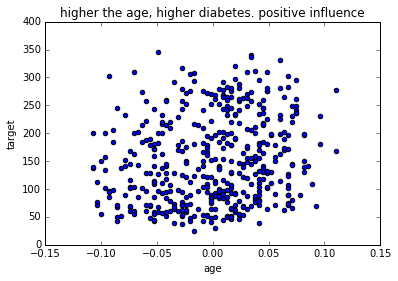

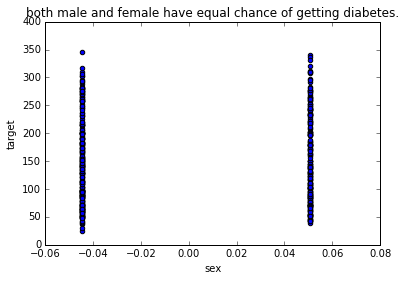

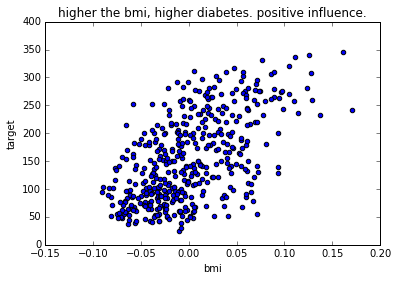

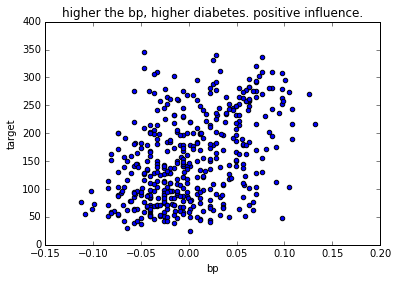

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.title('higher the age, higher diabetes. positive influence')
plt.xlabel('age')
plt.ylabel('target')
plt.scatter(data.age, data.target)
plt.show()
# higher the age, higher diabetes. positive influence
plt.title('both male and female have equal chance of getting diabetes.')
plt.xlabel('sex')
plt.ylabel('target')
plt.scatter(data.sex, data.target)
plt.show()
# both male and female have equal chance of getting diabetes.
plt.title('higher the bmi, higher diabetes. positive influence.')
plt.xlabel('bmi')
plt.ylabel('target')
plt.scatter(data.bmi, data.target)
plt.show()
# higher the bmi, higher diabetes. positive influence.
plt.title('higher the bp, higher diabetes. positive influence.')
plt.xlabel('bp')
plt.ylabel('target')
plt.scatter(data.bp, data.target)
plt.show()
# higher the bp, higher diabetes. positive influence.

c. (3 pts) Using ordinary least squares, fit a multiple linear regression (MLR) on all the feature variables using the entire dataset (442 rows). Report the regression coefficient of each input feature and evaluate the model using mean squared error (MSE). Example of ordinary least squares in Python is shown in Section 1.1.1 of http://scikit-learn.org/stable/modules/linear_model.html.

In [4]:
features = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
regr = linear_model.LinearRegression()
regr.fit(data[features], data['target'])
print 'intercept', regr.intercept_
print regr.coef_
print '----------------------------------'
print 'coefficients'
print '----------------------------------'
for f, c in zip(features, regr.coef_):
    print f, c
print '----------------------------------'
print 'mean squared error MSE'
print '----------------------------------'
from sklearn.metrics import mean_squared_error
print mean_squared_error(regr.predict(data[features]), data['target'])

intercept 152.133484163
[ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]
----------------------------------
coefficients
----------------------------------
age -10.0121978175
sex -239.819089366
bmi 519.83978679
bp 324.390427689
s1 -792.184161628
s2 476.745837824
s3 101.044570321
s4 177.064176232
s5 751.279321087
s6 67.625386391
----------------------------------
mean squared error MSE
----------------------------------
2859.69039877


d.  (4 pts) Split the data into a training set and a test set.  Use the first 300 rows for training set and remaining rows for test set.  Fit an MLR using the training set.  Evaluate the trained model using the training set and the test set, respectively.  Compare the two MSE values thus obtained.

In [5]:
# shuffle the data
import sklearn.utils
data = sklearn.utils.shuffle(data)
# split train and test data
train = data[:300]
test = data[300:]
print '--------------------'
print 'shuffled data frame'
print '--------------------'
data.head()

--------------------
shuffled data frame
--------------------


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
342,0.056239,0.050680,0.021817,0.056301,-0.007073,0.018101,-0.032356,-0.002592,-0.023645,0.023775,178.0
111,0.019913,-0.044642,0.004572,-0.026328,0.023198,0.010273,0.067048,-0.039493,-0.023645,-0.046641,59.0
328,-0.038207,-0.044642,0.067085,-0.060757,-0.029088,-0.023234,-0.010266,-0.002592,-0.001499,0.019633,78.0
392,-0.041840,0.050680,-0.029918,-0.002228,0.021822,0.036577,0.011824,-0.002592,-0.041180,0.065196,118.0
11,0.027178,0.050680,0.017506,-0.033214,-0.007073,0.045972,-0.065491,0.071210,-0.096433,-0.059067,69.0


In [6]:
regr2 = linear_model.LinearRegression()
regr2.fit(train[features], train['target'])
predicted = regr2.predict(test[features])
print '-------------'
print 'train MSE'
print '-------------'
print mean_squared_error(regr.predict(train[features]), train['target'])
print '-------------'
print 'test MSE'
print '-------------'
print mean_squared_error(predicted, test['target'])

-------------
train MSE
-------------
2970.91032357
-------------
test MSE
-------------
2822.2850952


e.  (3 pts) Do you think your MLR model is reasonable for this problem? You may look at the distribution of residuals to provide an informed answer.


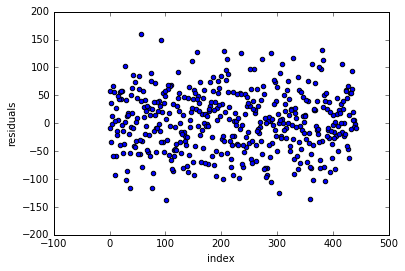

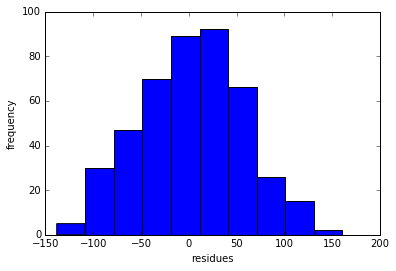

In [10]:
# predict the target on whole dataset
# using above model
predicted = regr2.predict(data[features])
residues = predicted - data['target']
# plot the distribution of residuals
plt.xlabel('index')
plt.ylabel('residuals')
plt.scatter(residues.index, residues)
plt.show()
plt.xlabel('residues')
plt.ylabel('frequency')
plt.hist(residues)
plt.show()
# Since distribution of residuals have constant band of values and histogram matches normal distribution,
# which was our underlying assumption, we can conclude that our MLR model is reasonable.

Since distribution of residuals have constant band of values and histogram matches normal distribution,
which was our underlying assumption, we can conclude that our MLR model is reasonable.